# Football Data Analysis

## Introduction

Football is a sport filled with numbers and data, and data analysis has become an important tool for understanding the game. By analyzing data, coaches and players can gain insights into the game and create a foundation for better decision-making, both on and off the field.

Football data analysis is all about understanding the game and how it works, from player performance and team dynamics to broader trends in the league. Data analysis can help uncover trends, find strengths and weaknesses, and identify opportunities for improvement. The goal is to gain a deeper understanding of the sport from a quantitative perspective.

This project will cover the fundamentals of data science by exploring a real-world data set. First, we will load the necessary libraries for the project. This includes libraries such as pandas and sqlite3 for data handling, matplotlib for visualization and numpy.

In [1]:
import pandas as pd
import numpy as npy
import sqlite3 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con = sqlite3.connect('football-data.sqlite')

In [3]:
def w(x, wtype = 'linear'):
    n = len(x)
    if wtype == 'none':
        return [1]*n
    if wtype == 'linear':
        y = [a for a in x]
        s = npy.sum(y)
        return n * (y/s)
    if wtype == 'cuadratic':
        y = [a**2 for a in x]
        s = npy.sum(y)
        return n * (y/s)

In [4]:
def sql_hf_query(HT, SE):
    return f"""SELECT HomeTeam AS HT, AVG(FTHG) AS Hf FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND HT LIKE '{HT}'
                  AND Season LIKE '{SE}';"""

def sql_thf_query(SE):
    return f"""SELECT AVG(FTHG) AS THf FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND Season LIKE '{SE}';"""

def sql_ac_query(AT, SE):
    return f"""SELECT AwayTeam AS AT, AVG(FTHG) AS Ac FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND AT LIKE '{AT}'
                  AND Season LIKE '{SE}';"""

def sql_tac_query(SE):
    return f"""SELECT AwayTeam AS AT, AVG(FTHG) AS TAc FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND Season LIKE '{SE}';"""
    
def sql_af_query(AT, SE):
    return f"""SELECT AwayTeam AS AT, AVG(FTAG) AS Af FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND AT LIKE '{AT}'
                  AND Season LIKE '{SE}';"""

def sql_taf_query(SE):
    return f"""SELECT AVG(FTAG) AS TAf FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND Season LIKE '{SE}';"""
    
def sql_hc_query(HT, SE):
    return f"""SELECT HomeTeam AS HT, AVG(FTAG) AS Hc FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND HT LIKE '{HT}'
                  AND Season LIKE '{SE}';"""

def sql_thc_query(SE):
    return f"""SELECT HomeTeam AS HT, AVG(FTAG) AS THc FROM footballdata
                WHERE Div LIKE 'SP1'
                  AND Season LIKE '{SE}';"""    

In [5]:
seasons = [x[0] for x in pd.read_sql_query("SELECT Season FROM footballdata;", con = con). value_counts().index.tolist()]
seasons.sort()
seasons

['1995/1996',
 '1996/1997',
 '1997/1998',
 '1998/1999',
 '1999/2000',
 '2000/2001',
 '2001/2002',
 '2002/2003',
 '2003/2004',
 '2004/2005',
 '2005/2006',
 '2006/2007',
 '2007/2008',
 '2008/2009',
 '2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022',
 '2022/2023']

In [6]:
HT = 'Ath Bilbao'
AT = 'Betis'

results = []

for season in seasons:
    
    try:
        Hf = \
        pd.read_sql_query(
            sql = sql_hf_query(HT, season),
            con = con)['Hf'][0]
    except:
        Hf = npy.nan
    try:
        Af = \
        pd.read_sql_query(
            sql = sql_af_query(AT, season),
            con = con)['Af'][0]    
    except:
        Af = npy.nan
    try:
        Ac = \
        pd.read_sql_query(
            sql = sql_ac_query(AT, season),
            con = con)['Ac'][0]   
    except:
        Ac = npy.nan
    try:
        Hc = \
        pd.read_sql_query(
            sql = sql_hc_query(HT, season),
            con = con)['Hc'][0]           
    except:
        Hc = npy.nan
    try:
        THf = \
        pd.read_sql_query(
            sql = sql_thf_query(season),
            con = con)['THf'][0]
    except:
        THf = npy.nan
    try:
        TAf = \
        pd.read_sql_query(
            sql = sql_taf_query(season),
            con = con)['TAf'][0]     
    except:
        TAf = npy.nan
    try:
        TAc = \
        pd.read_sql_query(
            sql = sql_tac_query(season),
            con = con)['TAc'][0]   
    except:
        TAc = npy.nan
    try:
        THc = \
        pd.read_sql_query(
            sql = sql_thc_query(season),
            con = con)['THc'][0]       
    except:
        THc = npy.nan
    
    # print(five_seasons[i])
    # print("\n")
    # print("Ataque del Equipo Local")
    # print("-----------------------")
    # print(f"Hf: {Hf}")
    # print(f"THf: {THf}")
    # print(f"Hf/THf (Hf_r): {Hf/THf}")
    # print("\n")
    # print("Defensa del Equipo Visitante")
    # print("----------------------------")
    # print(f"Ac: {Ac}")
    # print(f"TAc: {TAc}")
    # print(f"Ac/TAc (Ac_r): {Ac/TAc}")
    # print("\n")
    # print("Goles Esperados por el Equipo Local")
    # print("-----------------------------------")    
    # print(f"Goles Esperados: {(Hf/THf)*(Ac/TAc)*THf}")    
    # print("\n")
    # print("Ataque del Equipo Visitante")
    # print("-----------------------")
    # print(f"Af: {Af}")
    # print(f"TAf: {TAf}")
    # print(f"Af/TAf (Af_r): {Af/TAf}")
    # print("\n")
    # print("Defensa del Equipo Local")
    # print("----------------------------")
    # print(f"Hc: {Hc}")
    # print(f"THc: {THc}")
    # print(f"Hc/THc (Hc_r): {Hc/THc}")
    # print("\n")
    # print("Goles Esperados por el Equipo Visitante")
    # print("-----------------------------------")    
    # print(f"Goles Esperados: {(Af/TAf)*(Hc/THc)*THc}")    
    
    try: 
        FDRA = Ac/TAc # Fuerza Defensiva Relativa Away
    except:
        FDRA = npy.nan
        
    try: 
        GEH = (Hf/THf)*(Ac/TAc)*THf # Goles Esperados Home
    except:
        GEH = npy.nan
        
    try: 
        FARA = Af/TAf # Fuerza Atacante Relativa Away
    except:
        FARA = npy.nan
        
    try:
        FDRH = Hc/THc # Fuerza Defensiva Relativa Home
    except:
        FDRH = Hc/THc
        
    try:
        FARH = Hf/THf # Fuerza Atacante Relativa Home
    except:
        FARH = npy.nan
        
    try: 
        GEA = (Af/TAf)*(Hc/THc)*THc # Goles Esperados Away
    except:
        GEA = npy.nan        
    
    results.append([Hf, THf, FARH, 
                    Ac, TAc, FDRA, 
                    GEH, 
                    Af, TAf, FARA, 
                    Hc, THc, FDRH, 
                    GEA]) 
    

In [7]:
results = pd.DataFrame(results).T
results.columns = seasons
results.index = [
    'Media de Goles Realizados del Equipo Local',
    'Media de Goles Realizados de los Equipos Locales',
    'Fuerza Atacante Relativa del Equipo Local',
    
    'Media de Goles Recibidos del Equipo Visitante',
    'Media de Goles Recibidos de los Equipos Visitantes',
    'Fuerza Defensiva Relativa del Equipo Visitante',
    
    'Goles Esperados del Equipo Local',
    
    'Media de Goles Realizados del Equipo Visitante',
    'Media de Goles Realizados de los Equipos Visitantes',
    'Fuerza Atacante Relativa del Equipo Visitante',
    
    'Media de Goles Recibidos del Equipo Local',
    'Media de Goles Recibidos de los Equipos Locales',
    'Fuerza Defensiva Relativa del Equipo Local', 

    'Goles Esperados del Equipo Visitante']

results

,1995/1996,1996/1997,1997/1998,1998/1999,1999/2000,2000/2001,2001/2002,2002/2003,2003/2004,2004/2005,...,2013/2014,2014/2015,2015/2016,2016/2017,2017/2018,2018/2019,2019/2020,2020/2021,2021/2022,2022/2023
Media de Goles Realizados del Equipo Local,1.190476,1.952381,1.894737,1.578947,1.526316,1.684211,1.210526,1.578947,1.684211,2.052632,...,2.210526,1.473684,1.842105,1.894737,1.000000,1.368421,1.105263,1.526316,1.526316,1.500000
Media de Goles Realizados de los Equipos Locales,1.560606,1.647186,1.581579,1.610526,1.573684,1.768421,1.502632,1.552632,1.481579,1.515789,...,1.631579,1.536842,1.618421,1.663158,1.547368,1.452632,1.436842,1.368421,1.421053,1.392857
Fuerza Atacante Relativa del Equipo Local,0.762829,1.185283,1.198003,0.980392,0.969900,0.952381,0.805604,1.016949,1.136767,1.354167,...,1.354839,0.958904,1.138211,1.139241,0.646259,0.942029,0.769231,1.115385,1.074074,1.076923
Media de Goles Recibidos del Equipo Visitante,1.142857,0.952381,1.526316,1.684211,2.000000,NaN,1.105263,1.684211,1.210526,1.473684,...,2.473684,NaN,1.526316,2.105263,1.578947,1.368421,1.736842,1.526316,0.947368,1.000000
Media de Goles Recibidos de los Equipos Visitantes,1.560606,1.647186,1.581579,1.610526,1.573684,1.768421,1.502632,1.552632,1.481579,1.515789,...,1.631579,1.536842,1.618421,1.663158,1.547368,1.452632,1.436842,1.368421,1.421053,1.392857
Fuerza Defensiva Relativa del Equipo Visitante,0.732316,0.578187,0.965058,1.045752,1.270903,NaN,0.735552,1.084746,0.817052,0.972222,...,1.516129,NaN,0.943089,1.265823,1.020408,0.942029,1.208791,1.115385,0.666667,0.717949
Goles Esperados del Equipo Local,0.871805,1.128840,1.828531,1.651187,1.939799,NaN,0.890405,1.712756,1.376087,1.995614,...,3.351443,NaN,1.737270,2.398401,1.020408,1.289092,1.336032,1.702429,1.017544,1.076923
Media de Goles Realizados del Equipo Visitante,1.047619,1.761905,1.000000,1.263158,0.736842,NaN,0.842105,1.315789,1.263158,1.368421,...,0.894737,NaN,0.894737,1.000000,1.315789,1.000000,0.736842,1.210526,1.473684,0.714286
Media de Goles Realizados de los Equipos Visitantes,1.136364,1.103896,1.073684,1.028947,1.055263,1.113158,1.026316,1.121053,1.189474,1.063158,...,1.118421,1.118421,1.126316,1.278947,1.147368,1.134211,1.042105,1.139474,1.081579,1.150000
Fuerza Atacante Relativa del Equipo Visitante,0.921905,1.596078,0.931373,1.227621,0.698254,NaN,0.820513,1.173709,1.061947,1.287129,...,0.800000,NaN,0.794393,0.781893,1.146789,0.881671,0.707071,1.062356,1.362530,0.621118


<AxesSubplot:>

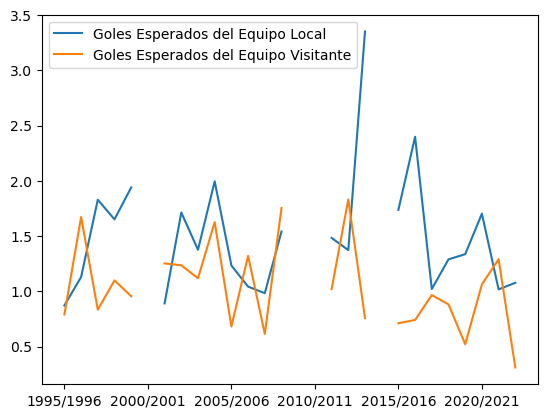

In [8]:
results.loc[('Goles Esperados del Equipo Local', 'Goles Esperados del Equipo Visitante'),:].T.plot()

In [9]:
results.loc[('Goles Esperados del Equipo Local', 'Goles Esperados del Equipo Visitante'),:].T

,Goles Esperados del Equipo Local,Goles Esperados del Equipo Visitante
1995/1996,0.871805,0.790204
1996/1997,1.128840,1.672082
1997/1998,1.828531,0.833333
1998/1999,1.651187,1.098398
1999/2000,1.939799,0.955506
2000/2001,NaN,NaN
2001/2002,0.890405,1.252362
2002/2003,1.712756,1.235483
2003/2004,1.376087,1.117839
2004/2005,1.995614,1.625847


In [10]:
results.loc[['Goles Esperados del Equipo Local', 'Goles Esperados del Equipo Visitante'], ['2016/2017', '2017/2018', '2019/2020', '2020/2021', '2021/2022']]

,2016/2017,2017/2018,2019/2020,2020/2021,2021/2022
Goles Esperados del Equipo Local,2.398401,1.020408,1.336032,1.702429,1.017544
Goles Esperados del Equipo Visitante,0.740741,0.965717,0.520999,1.062356,1.290818


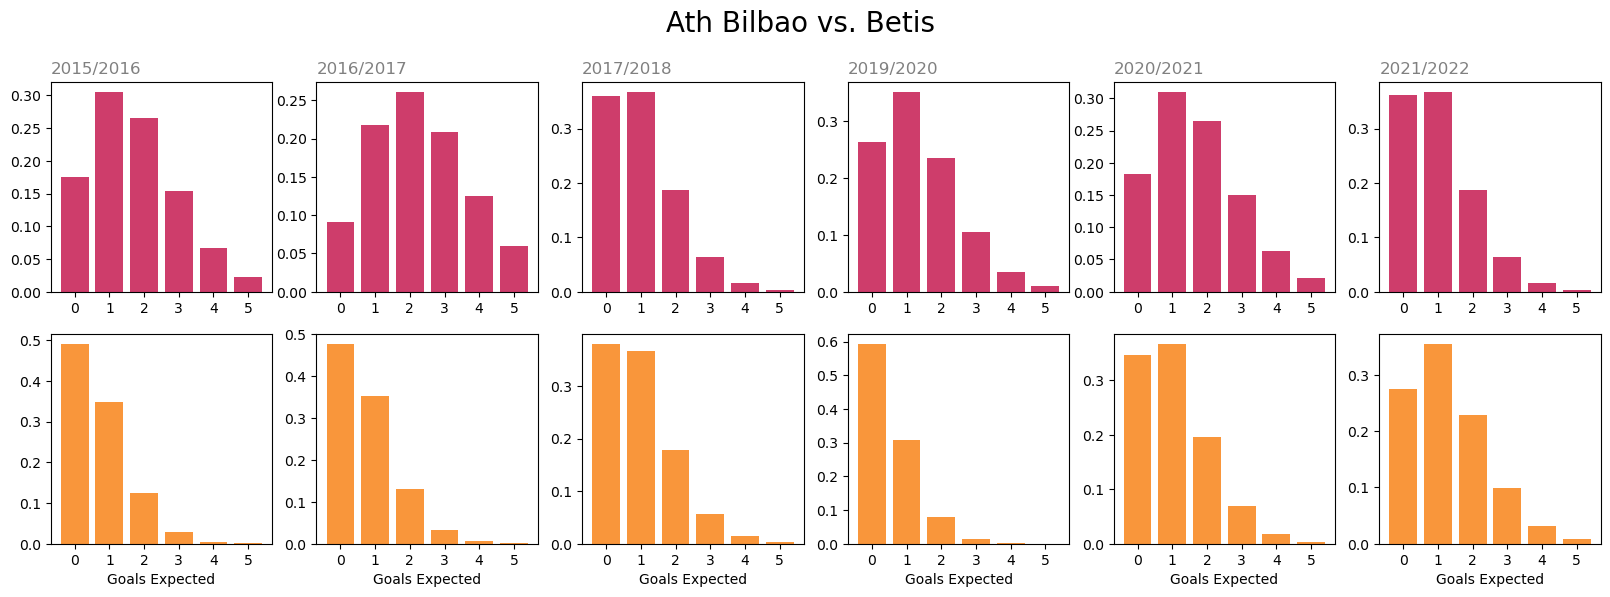

In [18]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(nrows = 2, ncols = 6, figsize = (20, 6))

for s, ax in zip(['2015/2016', '2016/2017', '2017/2018', '2019/2020', '2020/2021', '2021/2022'], [ax1, ax2, ax3, ax4, ax5, ax6]):
    m = results.loc['Goles Esperados del Equipo Local', [s]][0]
    g_ = [0, 1, 2, 3, 4, 5]
    p_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))
    ax.bar(g_, p_, alpha = 0.9, color = '#c9285b')
    ax.set_xticks([0,1,2,3,4,5])
    
    ax.set_title(s, loc ='left', color = '0.5')
    
for s, ax in zip(['2015/2016', '2016/2017', '2017/2018', '2019/2020', '2020/2021', '2021/2022'], [ax7, ax8, ax9, ax10, ax11, ax12]):
    m = results.loc['Goles Esperados del Equipo Visitante', [s]][0]
    g_ = [0, 1, 2, 3, 4, 5]
    p_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))
    ax.bar(g_, p_, alpha = 0.9, color = '#f98b26')
    ax.set_xticks([0,1,2,3,4,5]) 
    ax.set_xlabel(r'Goals Expected')

# for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
#     ax.set_ylim(0.0, 0.8)

fig.suptitle(t = f"{HT} vs. {AT}", y = 1.0, fontsize = 20)
plt.show()

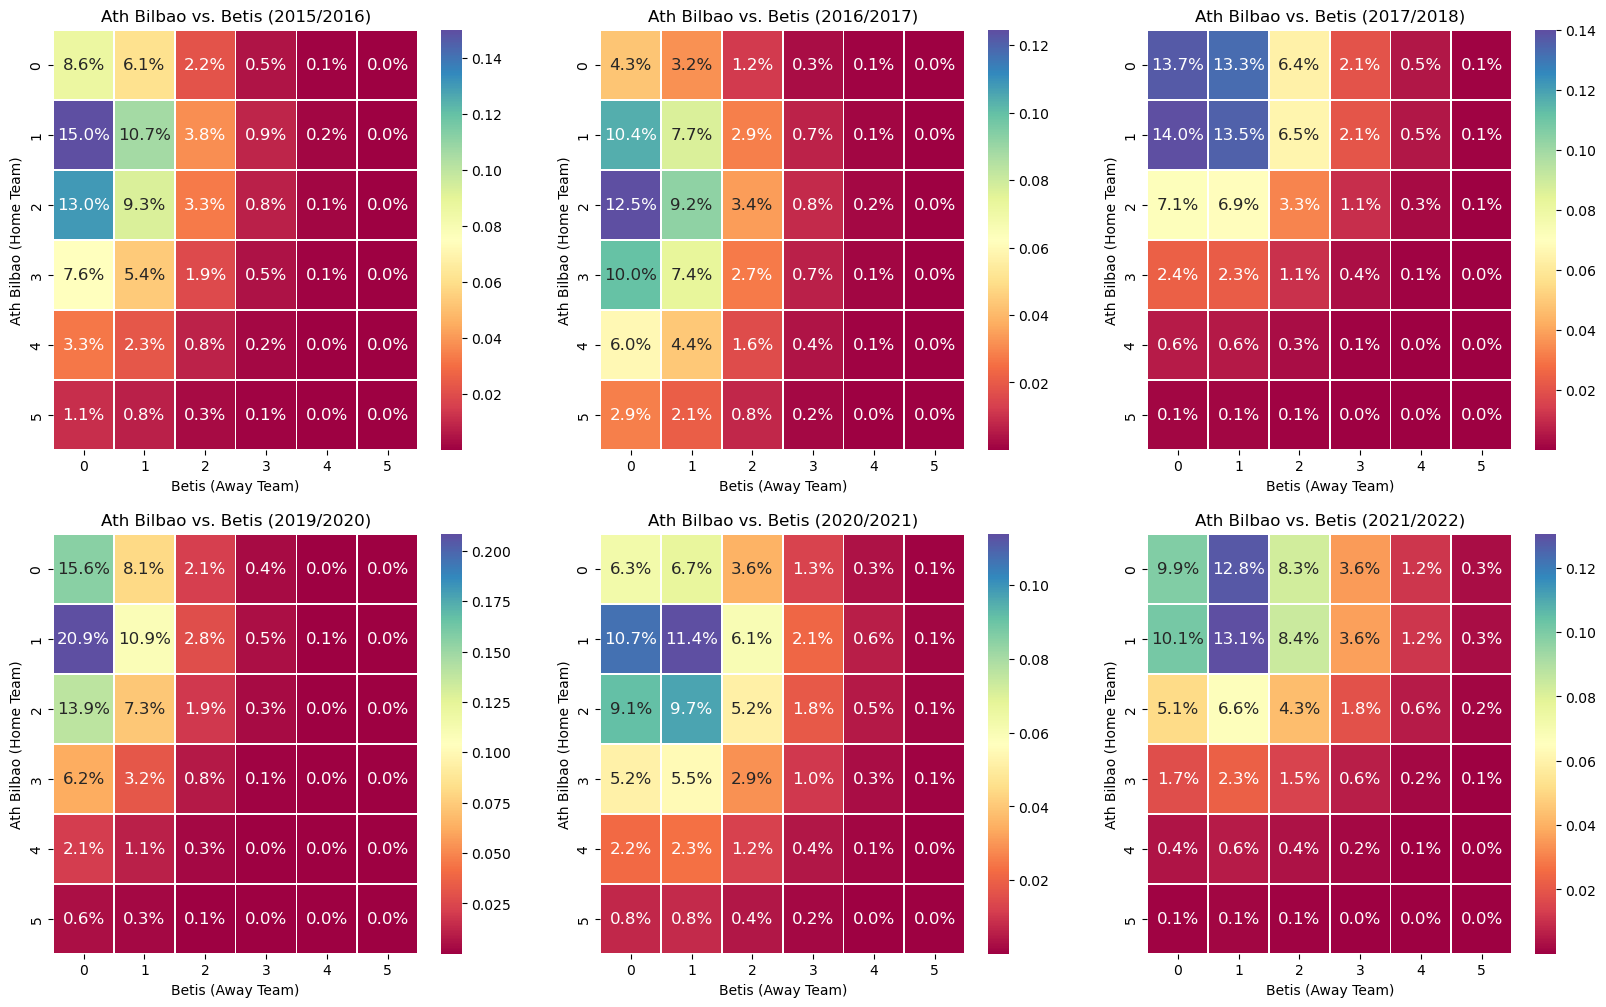

In [12]:
prediction = []

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 12))

for s, ax in zip(['2015/2016', '2016/2017', '2017/2018', '2019/2020', '2020/2021', '2021/2022'], [ax1, ax2, ax3, ax4, ax5, ax6]):
    m = results.loc['Goles Esperados del Equipo Local', [s]][0]
    g_ = [0, 1, 2, 3, 4, 5]
    p_local_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))
    
    m = results.loc['Goles Esperados del Equipo Visitante', [s]][0]
    g_ = [0, 1, 2, 3, 4, 5]
    p_visitante_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))
    
    df_to_heatmap = \
        pd.DataFrame({
            '0': [p_visitante_[0] * x for x in p_local_],
            '1': [p_visitante_[1] * x for x in p_local_],
            '2': [p_visitante_[2] * x for x in p_local_],
            '3': [p_visitante_[3] * x for x in p_local_],
            '4': [p_visitante_[4] * x for x in p_local_],
            '5': [p_visitante_[5] * x for x in p_local_]}, 
        index = ['0','1','2','3','4','5'])
    
    prediction.append(df_to_heatmap)
    
    g = sns.heatmap(df_to_heatmap, ax = ax, annot = True, annot_kws = {"size": 12}, fmt = ".1%", 
                    linewidths = 0.5, cmap = 'Spectral')#'Spectral')
    g.set(xlabel = f'{AT} (Away Team)', ylabel = f'{HT} (Home Team)', title = f"{HT} vs. {AT} ({s})")
        
    
    

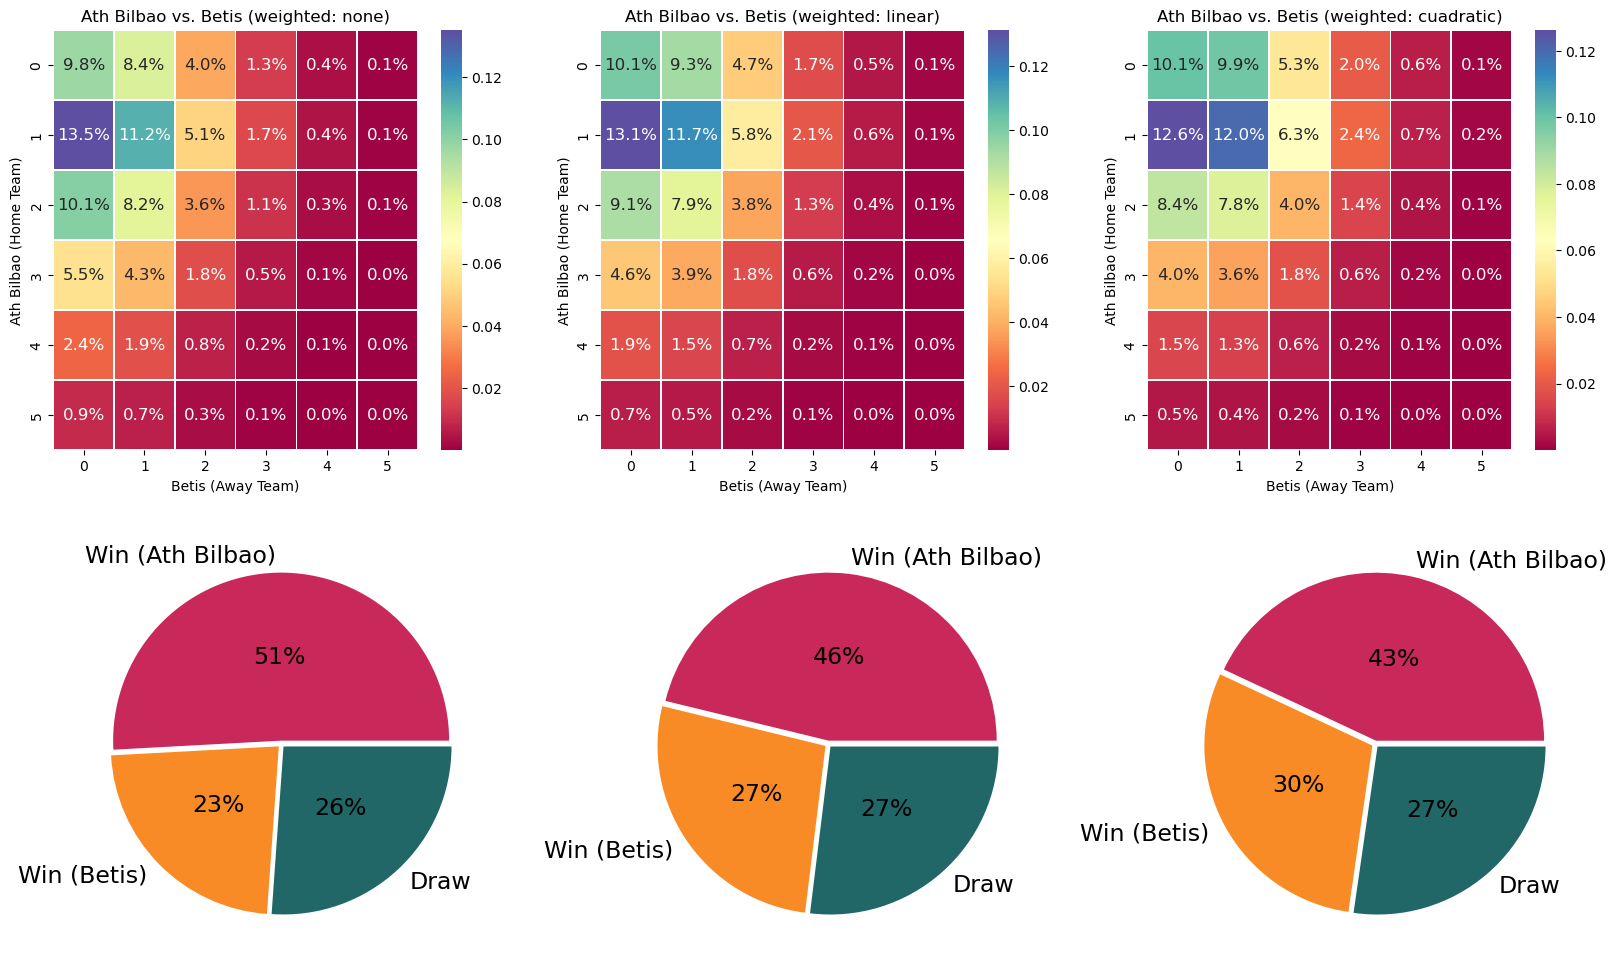

In [16]:
def func(pct):
    return "{:1.1f}%".format(pct)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 12))

for ax, estimation in zip([ax1, ax2, ax3], ['none', 'linear', 'cuadratic']):
    
    dfestimation = prediction[0]*w([1,2,3,4,5,6], estimation)[0]
    for i_ in [1,2,3,4,5]:
        dfestimation = dfestimation + prediction[i_]*w([1,2,3,4,5,6], estimation)[i_]
    dfestimation = dfestimation / 6
    
    g = sns.heatmap(dfestimation, ax = ax, annot = True, annot_kws = {"size": 12}, fmt = ".1%", 
                    linewidths = 0.5, cmap = 'Spectral')#'Spectral')
    g.set(xlabel = f'{AT} (Away Team)', ylabel = f'{HT} (Home Team)', title = f"{HT} vs. {AT} (weighted: {estimation})")

for ax, estimation in zip([ax4, ax5, ax6], ['none', 'linear', 'cuadratic']):    

    dfestimation = prediction[0]*w([1,2,3,4,5,6], estimation)[0]
    for i_ in [1,2,3,4,5]:
        dfestimation = dfestimation + prediction[i_]*w([1,2,3,4,5,6], estimation)[i_]
    dfestimation = dfestimation / 6   
    
    mask_win_away = npy.ones(dfestimation.shape, dtype = 'bool')
    mask_win_away[npy.tril_indices(len(dfestimation))] = False
    probability_win_away = npy.sum(npy.sum(dfestimation.mask(~mask_win_away)))

    mask_win_home = npy.ones(dfestimation.shape, dtype = 'bool')
    mask_win_home[npy.triu_indices(len(dfestimation))] = False
    probability_win_home = npy.sum(npy.sum(dfestimation.mask(~mask_win_home)))

    probability_draw = 1.0 - probability_win_home - probability_win_away
    
    ax.pie([probability_win_home, probability_win_away, probability_draw],
           explode = [0.02, 0.02, 0.02],
           autopct = '%1.0f%%',
           colors = ['#c9285b', '#f98b26', '#216767'],
           pctdistance = 0.5,
           labeldistance = 1.1,
           textprops = {'fontsize': 17},
           labels = [f'Win ({HT})',
                     f'Win ({AT})',
                     'Draw'])
    

In [ ]:
mask_win_away = npy.ones(dfestimation.shape, dtype = 'bool')
mask_win_away[npy.tril_indices(len(dfestimation))] = False
probability_win_away = npy.sum(npy.sum(dfestimation.mask(~mask_win_away)))

mask_win_home = npy.ones(dfestimation.shape, dtype = 'bool')
mask_win_home[npy.triu_indices(len(dfestimation))] = False
probability_win_home = npy.sum(npy.sum(dfestimation.mask(~mask_win_home)))

probability_draw = 1.0 - probability_win_home - probability_win_away


In [12]:
con.close()